# Reading file

In [1]:
import os

folder_path = 'YOUR_PATH'

file_list = os.listdir(folder_path)

print("Files in the folder:")
for i, file_name in enumerate(file_list):
    print(f"{i+1}. {file_name}")

user_choice = int(input("Please select the desired file number: "))

selected_file = file_list[user_choice-1]
file_path = os.path.join(folder_path, selected_file)
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

Files in the folder:
1. booksummaries.txt
2. 2.ipynb
3. task.ipynb
Please select the desired file number: 1


# Data Analyze

In [2]:
def explore_text_content(content):
    num_characters = len(content)
    num_words = len(content.split())
    unique_words = set(content.split())
    num_unique_words = len(unique_words)
    return num_characters, num_words, num_unique_words

num_characters, num_words, num_unique_words = explore_text_content(content)

In [3]:
from tabulate import tabulate

Full_Analyze = [
    ["Number of characters", num_characters],
    ["Number of words", num_words],
    ["Number of unique words", num_unique_words]
]

print(tabulate(Full_Analyze, headers=["Metric", "Value"], tablefmt="grid"))

+------------------------+----------+
| Metric                 |    Value |
+========================+==========+
| Number of characters   | 43403998 |
+------------------------+----------+
| Number of words        |  7313903 |
+------------------------+----------+
| Number of unique words |   379697 |
+------------------------+----------+


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

words = word_tokenize(content)
sentences = sent_tokenize(content)
stopWords = set(stopwords.words("english"))

In [5]:
fdist = FreqDist(words)
fdist.most_common(10)

print("\nMost Common Words:")
print(tabulate(fdist.most_common(10), headers=["Word", "Frequency"], tablefmt="grid"))


Most Common Words:
+--------+-------------+
| Word   |   Frequency |
+========+=============+
| ,      |      459684 |
+--------+-------------+
| the    |      441251 |
+--------+-------------+
| .      |      326359 |
+--------+-------------+
| to     |      246217 |
+--------+-------------+
| and    |      240876 |
+--------+-------------+
| of     |      198934 |
+--------+-------------+
| a      |      178633 |
+--------+-------------+
| is     |      120096 |
+--------+-------------+
| in     |      116285 |
+--------+-------------+
| ''     |       86302 |
+--------+-------------+


In [6]:
filtered_words = [word for word in words if word.lower() not in stopWords and word.isalpha()]

fdist_filtered = FreqDist(filtered_words)
fdist_filtered.most_common(10)

print("\nMost Common Filtered Words:")
print(tabulate(fdist_filtered.most_common(10), headers=["Word", "Frequency"], tablefmt="grid"))


Most Common Filtered Words:
+--------+-------------+
| Word   |   Frequency |
+========+=============+
| one    |       14971 |
+--------+-------------+
| time   |       11103 |
+--------+-------------+
| also   |       10752 |
+--------+-------------+
| two    |       10404 |
+--------+-------------+
| life   |        9822 |
+--------+-------------+
| novel  |        9169 |
+--------+-------------+
| back   |        9080 |
+--------+-------------+
| father |        8910 |
+--------+-------------+
| story  |        8574 |
+--------+-------------+
| book   |        8507 |
+--------+-------------+


# Data Cleaning

In [7]:
freqTable = dict()
for word in words:
  word = word.lower()
  if word in stopWords:
    continue
  if word in freqTable:
    freqTable[word] += 1
  else:
    freqTable[word] = 1

sentences = nltk.sent_tokenize(content)
sentenceValue = dict()

for sentence in sentences:
    sentenceWords = word_tokenize(sentence)
    sentenceFreq = sum([freqTable.get(word.lower(), 0) for word in sentenceWords])
    if sentence not in sentenceValue:
        sentenceValue[sentence] = sentenceFreq

sumValues = sum(sentenceValue.values())
average = sumValues / len(sentenceValue) if len(sentenceValue) > 0 else 0

summaryword = ' '.join([sentence for sentence, value in sentenceValue.items() if value > (0.5 * average)])

# T5

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained('t5-base')
model = AutoModelWithLMHead.from_pretrained('t5-base', return_dict=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1699: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [9]:
inputs = tokenizer.encode("summarize: " + summaryword,
return_tensors='pt',
max_length=322,
truncation=True)

summary_ids = model.generate(inputs, max_length=120, min_length=80, length_penalty=5, num_beams=4, early_stopping=True, no_repeat_ngram_size=3)
summaryt5 = tokenizer.decode(summary_ids[0])

# Splitting each line into 7 words

In [10]:
words1 = summaryt5.split()
lines = [' '.join(words1[i:i+7]) for i in range(0, len(words1), 7)]

text = '\n'.join(lines)

text = text.replace('<pad>', '').replace('</s>', '')

# Summary output of the file

In [12]:
with open('summaries.txt', 'w') as file:
    file.write(text)

# Creating images

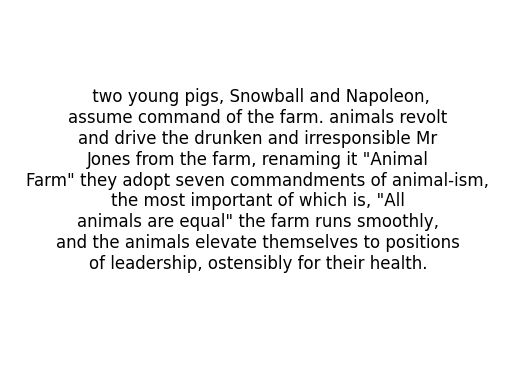

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.text(0.5, 0.3, text, fontsize=12, ha='center')
ax.axis('off')
plt.savefig('image.png')
plt.show()

In [ ]:
pip install diffusers accelerate PEFT

In [13]:
from diffusers import StableDiffusionXLPipeline
import re
import traceback


pipeline = StableDiffusionXLPipeline.from_pretrained(
    "RunDiffusion/Juggernaut-XL-v9", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

pipeline.load_lora_weights(
    "stabilityai/stable-diffusion-xl-base-1.0",
    weight_name="sd_xl_offset_example-lora_1.0.safetensors",
    adapter_name="offset"
)
pipeline.set_adapters(["offset"], adapter_weights=[0.2])

word_ids = [pipeline.tokenizer.convert_tokens_to_ids(word) for word in words]
bias = torch.full((pipeline.tokenizer.vocab_size,), -float("Inf")).to("cuda")
bias[word_ids] = 0

SENTENCES = [s.strip() for s in re.split(r"[.!?,]", text) if s.strip()]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
styles = {
    "cinematic": "cinematic film still of {prompt}, highly detailed, high budget hollywood movie, cinemascope, moody, epic, gorgeous, film grain",
    "anime": "anime artwork of {prompt}, anime style, key visual, vibrant, studio anime, highly detailed",
    "photographic": "cinematic photo of {prompt}, 35mm photograph, film, professional, 4k, highly detailed",
    "comic": "comic of {prompt}, graphic illustration, comic art, graphic novel art, vibrant, highly detailed",
    "lineart": "line art drawing {prompt}, professional, sleek, modern, minimalist, graphic, line art, vector graphics",
    "pixelart": " pixel-art {prompt}, low-res, blocky, pixel art style, 8-bit graphics",
}

In [16]:
def get_desired_style():
    while True:
        desired_style = input("Please choose your favorite style: \n1-cinematic \n2-anime \n3-photographic \n4-comic \n5-lineart \n6-pixelart \n")
        if desired_style.isdigit() and 1 <= int(desired_style) <= 6:
            if desired_style == '1':
                return 'cinematic'
            elif desired_style == '2':
                return 'anime'
            elif desired_style == '3':
                return 'photographic'
            elif desired_style == '4':
                return 'comic'
            elif desired_style == '5':
                return 'lineart'
            elif desired_style == '6':
                return 'pixelart'
        else:
            print("Invalid choice. Please try again.")
method = get_desired_style()
print(f"Our style is {method}")

Please choose your favorite style: 
1-cinematic 
2-anime 
3-photographic 
4-comic 
5-lineart 
6-pixelart 
3
Our style is photographic


In [17]:
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

for i, SENTENCE in enumerate(SENTENCES):
    if SENTENCE.strip():
        prompt = styles[method].format(prompt=SENTENCE.strip())
        image = pipeline(
            prompt,
            width=1152,
            height=896,
            guidance_scale=7.5,
            num_inference_steps=25,
        ).images[0]
        image_path = os.path.join(output_dir, f"image_{i+1}.png")
        try:
            image.save(image_path)
            print(f"Image {i+1} saved: {image_path}")
        except Exception as e:
            print(f"Error saving image {i+1}:")
            traceback.print_exc()

  0%|          | 0/25 [00:00<?, ?it/s]

Image 1 saved: output_images/image_1.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 2 saved: output_images/image_2.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 3 saved: output_images/image_3.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 4 saved: output_images/image_4.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 5 saved: output_images/image_5.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 6 saved: output_images/image_6.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 7 saved: output_images/image_7.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 8 saved: output_images/image_8.png


  0%|          | 0/25 [00:00<?, ?it/s]

Image 9 saved: output_images/image_9.png
